### **Introduction**


*   Climate change has emerged as a key global issue in the 21st century, and carbon dioxide (CO₂) emissions directly contribute to the accelerated anthropogenic global warming. With industries growing, transports evolving and energy consumptions raising, the call for accurate prediction of CO₂ emissions is more urgent than ever. This data is crucial for governments, policymakers, and environmental organizations to formulate effective strategies for carbon reduction, enforce emissions standards, and foster sustainability. In this project, we'll employ the use of a Linear Regression Model to predict the Carbon Emissions on the environment based on the features that we have in our dataset.
*   Most countries Kenya included, are striving to meet net zero carbon goals and reduce their environmental footprint, an accurate CO₂ emissions prediction model can provide actionable insights for sustainable decision-making. From improving fuel efficiency in the automotive sector to enhancing energy management in manufacturing, the applications of CO₂ prediction models extend across various domains, ensuring a data-driven approach to tackling climate change.
*   The table below illustrates the features we have together with their descriptions;

<div align="center">

| **Feature**                     | **Description** |
|---------------------------------|------------------------------------------------------------|
| **ENGINESIZE**                  | The size of the engine in liters (L). |
| **CYLINDERS**                   | The number of cylinders in the vehicle’s engine. |
| **FUELCONSUMPTION_CITY**        | Fuel consumption in the city (liters per 100 km). |
| **FUELCONSUMPTION_HWY**         | Fuel consumption on the highway (liters per 100 km). |
| **FUELCONSUMPTION_COMB**        | Combined fuel consumption (average of city and highway, liters per 100 km). |
| **FUELCONSUMPTION_COMB_MPG**    | Combined fuel consumption in miles per gallon (MPG). |
| **CO2EMISSIONS**                | The amount of CO₂ emitted by the vehicle (grams per km). |

</div>



### **Group Members**
*   Sharon Owino -    **166419**
*   Benard Ogol -    **188664**
*   Adeline Makokha - **191199**
*   Victor Radeny -   **119368**

### **Import the required Libraries**

In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge

### **Load the Dataset**

In [256]:
url = "https://raw.githubusercontent.com/benard3360-star/new/main/FuelConsumption%202.csv"
df = pd.read_csv(url)

### **Display basic dataset information**

In [257]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
None

In [258]:
print(df.head().to_string())

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS
0       2014  ACURA         ILX      COMPACT         2.0          4          AS5        Z                   9.9                  6.7                   8.5                        33           196
1       2014  ACURA         ILX      COMPACT         2.4          4           M6        Z                  11.2                  7.7                   9.6                        29           221
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4          AV7        Z                   6.0                  5.8                   5.9                        48           136
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6          AS6        Z                  12.7                  9.1                  11.1                        25           255
4       2014  ACURA     R

### **Check for missing values**

In [259]:
print("Missing Values:")
print(df.isnull().sum())



Missing Values:
MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64


### **Observations**
*   The dataset have no missing values

### **Statistical Analysis**

In [260]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


### **Observations**



*   From the Statistical Analysis, the minimum amount of Carbon emitted to the environment with vehicles is 488 with a minimum of 108 in volume.



### **Pairplot for selected features**

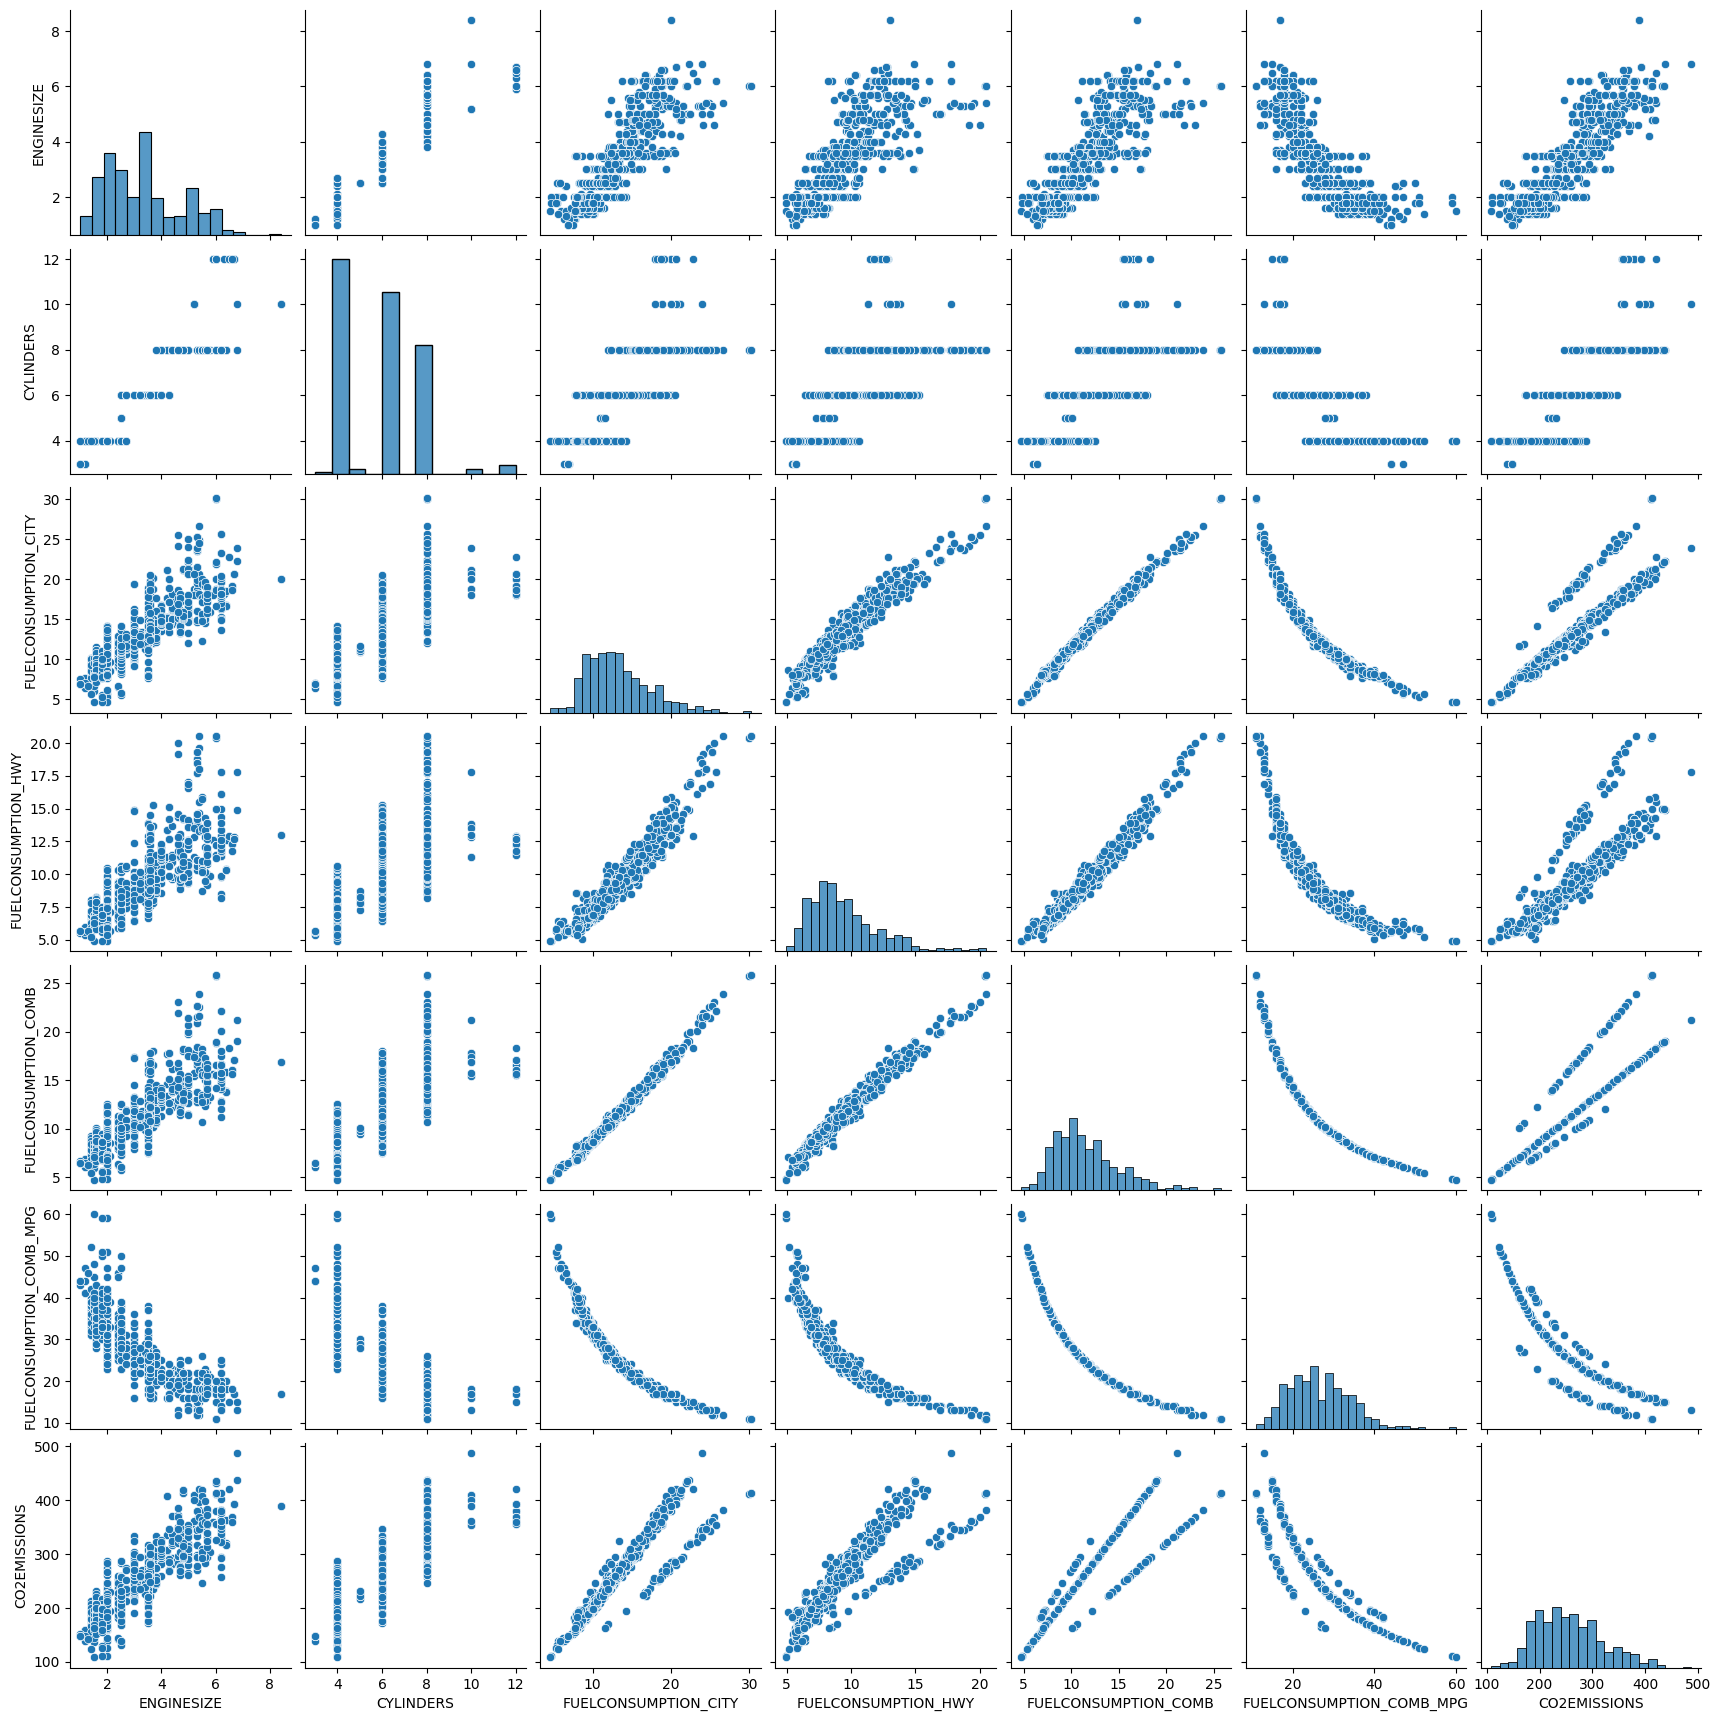

In [261]:
selected_features = ['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
sns.pairplot(df[selected_features])
plt.show()



### **Interpretations**
### **1. Diagonal (Histograms)**
- The diagonal plots show the **distribution of individual variables**.
- **ENGINESIZE**, **CYLINDERS**, **FUELCONSUMPTION_COMB**, and **CO2EMISSIONS** have different distributions:
  - **ENGINESIZE**: Right-skewed (most values are small, but a few large values exist).
  - **CYLINDERS**: Discrete values (e.g., 4, 6, 8, 12 cylinders are common).
  - **FUELCONSUMPTION_COMB**: Right-skewed.
  - **CO2EMISSIONS**: Right-skewed.

### **2. Off-Diagonal (Scatterplots)**
- Each scatterplot shows the relationship between two variables.

#### **Key Relationships Observed:**
1. **Engine Size vs CO2 Emissions**  
   - **Strong positive correlation** (as engine size increases, CO2 emissions increase).
   - Data points form an upward trend.

2. **Cylinders vs CO2 Emissions**  
   - **Positive correlation** but discrete values.
   - More cylinders → More CO2 emissions.

3. **Fuel Consumption (Combined) vs CO2 Emissions**  
   - **Very strong positive correlation** (almost linear).
   - As fuel consumption increases, CO2 emissions rise significantly.

4. **Engine Size vs Fuel Consumption**  
   - **Strong correlation**: Bigger engines consume more fuel.

5. **Cylinders vs Fuel Consumption**  
   - **Positive correlation** but with distinct levels (more cylinders generally mean more fuel consumption).


In [262]:
df= df.drop(columns=['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION','FUELTYPE'], axis=1)

In [263]:
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


### **Visualizing correlation between features and CO2EMISSIONS**

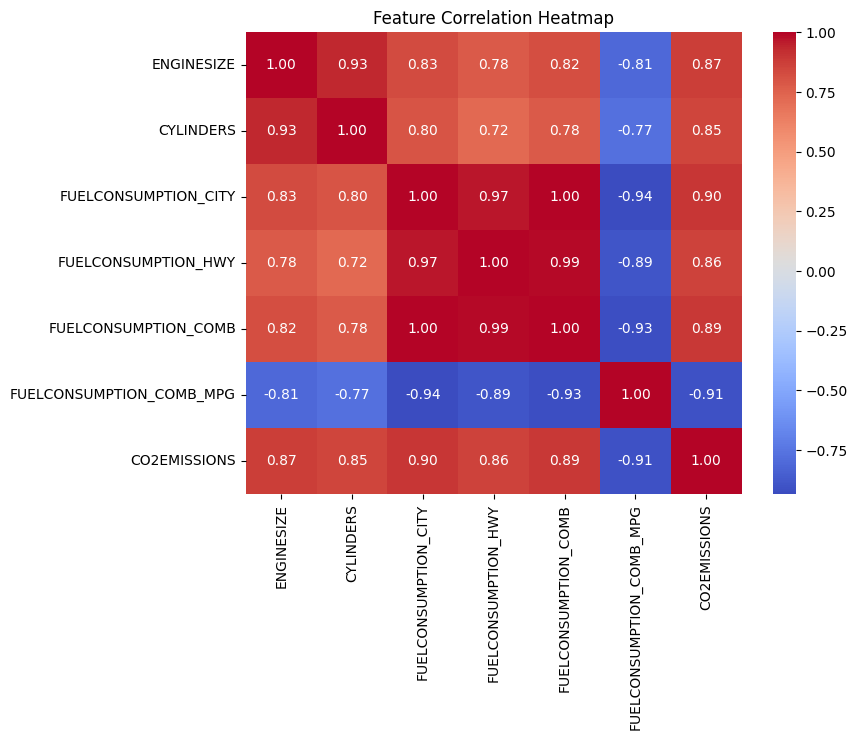

In [264]:
# Drop non-numeric columns before computing correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



### **Interpretations**

- **1.00 (Red):** Perfect positive correlation (variables increase together).
- **-1.00 (Blue):** Perfect negative correlation (one increases, the other decreases).
- **0 (White):** No correlation.

### **Key Interpretations:**
#### **Strong Positive Correlations (Red)**
1. **Fuel Consumption (City, Hwy, and Combined) vs CO2 Emissions (0.86 - 0.90)**
   - CO₂ emissions are highly correlated with fuel consumption, meaning higher fuel consumption leads to more CO₂ emissions.
   
2. **Engine Size vs CO2 Emissions (0.87)**
   - Bigger engines tend to produce more CO₂ emissions.

3. **Cylinders vs CO2 Emissions (0.85)**
   - More cylinders are associated with higher emissions.

4. **Fuel Consumption (City) vs Fuel Consumption (Highway & Combined) (0.97 - 1.00)**
   - Different fuel consumption metrics are strongly related, which is expected.

#### **Strong Negative Correlations (Blue)**
1. **Fuel Consumption (MPG) vs CO2 Emissions (-0.91)**
   - As fuel economy (measured in miles per gallon) increases, CO₂ emissions decrease.
   - This is expected because better fuel efficiency means less fuel burned.

2. **Fuel Consumption (MPG) vs Fuel Consumption (City, Hwy, Combined) (-0.94 to -0.89)**
   - Higher miles per gallon means lower fuel consumption.

### **Modeling**

### **Select relevant features and target variable**

In [265]:
features = ['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB']
target = 'CO2EMISSIONS'
X = df[features]
y = df[target]



### **Split data into training (80%) and testing (20%) sets**

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### **Train the Linear Regression model**

In [267]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### **Retrieve model coefficients**

In [268]:
coefficients = model.coef_
intercept = model.intercept_
print("Model Coefficients:", coefficients)
print("Model Intercept:", intercept)

Model Coefficients: [11.2094395   7.15561381  9.5208118 ]
Model Intercept: 67.3483851836209


### **Model Interpretation**

In [269]:
print("\nModel Interpretation:")
print(f"CO2EMISSIONS = {intercept:.2f} + ({coefficients[0]:.2f} * ENGINESIZE) + ({coefficients[1]:.2f} * CYLINDERS) + ({coefficients[2]:.2f} * FUELCONSUMPTION_COMB)")


Model Interpretation:
CO2EMISSIONS = 67.35 + (11.21 * ENGINESIZE) + (7.16 * CYLINDERS) + (9.52 * FUELCONSUMPTION_COMB)


### **Make predictions**

In [270]:
y_pred = model.predict(X_test)

### **Evaluate model performance**

In [271]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.4f}")

Mean Absolute Error (MAE): 16.72
Mean Squared Error (MSE): 512.86
Root Mean Squared Error (RMSE): 22.65
R-squared Score (R²): 0.8760


### **Interpretation of Model Evaluation Metrics**


### **1. Mean Absolute Error (MAE) = 16.72**  
- **Definition:** The average absolute difference between actual and predicted CO₂ emissions.  
- **Interpretation:** On average, the model's predictions are **off by ~16.72 g/km**.  
- **Lower MAE is better.** Since the scale of CO₂ emissions is large (~100–500 g/km), this error is relatively low.



### **2. Mean Squared Error (MSE) = 512.86**  
- **Definition:** The average squared differences between actual and predicted values.  
- **Interpretation:** The error is squared, making **larger errors more impactful**.  
- **MSE is useful for penalizing large errors** but is harder to interpret directly due to squaring.

---

### **3. Root Mean Squared Error (RMSE) = 22.65**  
- **Definition:** The square root of MSE, providing an error metric in the same units as the target variable.  
- **Interpretation:** On average, the model’s prediction deviates from actual values by **~22.65 g/km**.  
- **Compared to MAE (16.72), RMSE is slightly higher**, indicating **some large prediction errors** exist.  

**RMSE is preferred over MAE when larger errors need more penalty**.



### **4. R-squared Score (R²) = 0.8760**  
- **Definition:** The proportion of variance in CO₂ emissions explained by the model.  
- **Interpretation:** The model explains **87.6% of the variability** in CO₂ emissions based on Engine Size, Cylinders, and Fuel Consumption.  
- **A high R² (close to 1) means a strong fit.**  
- **Compared to your previous R² (0.861), this suggests a slight model improvement.**

### **Checking for Linearity, Normality, Homogeneity and Outliers**

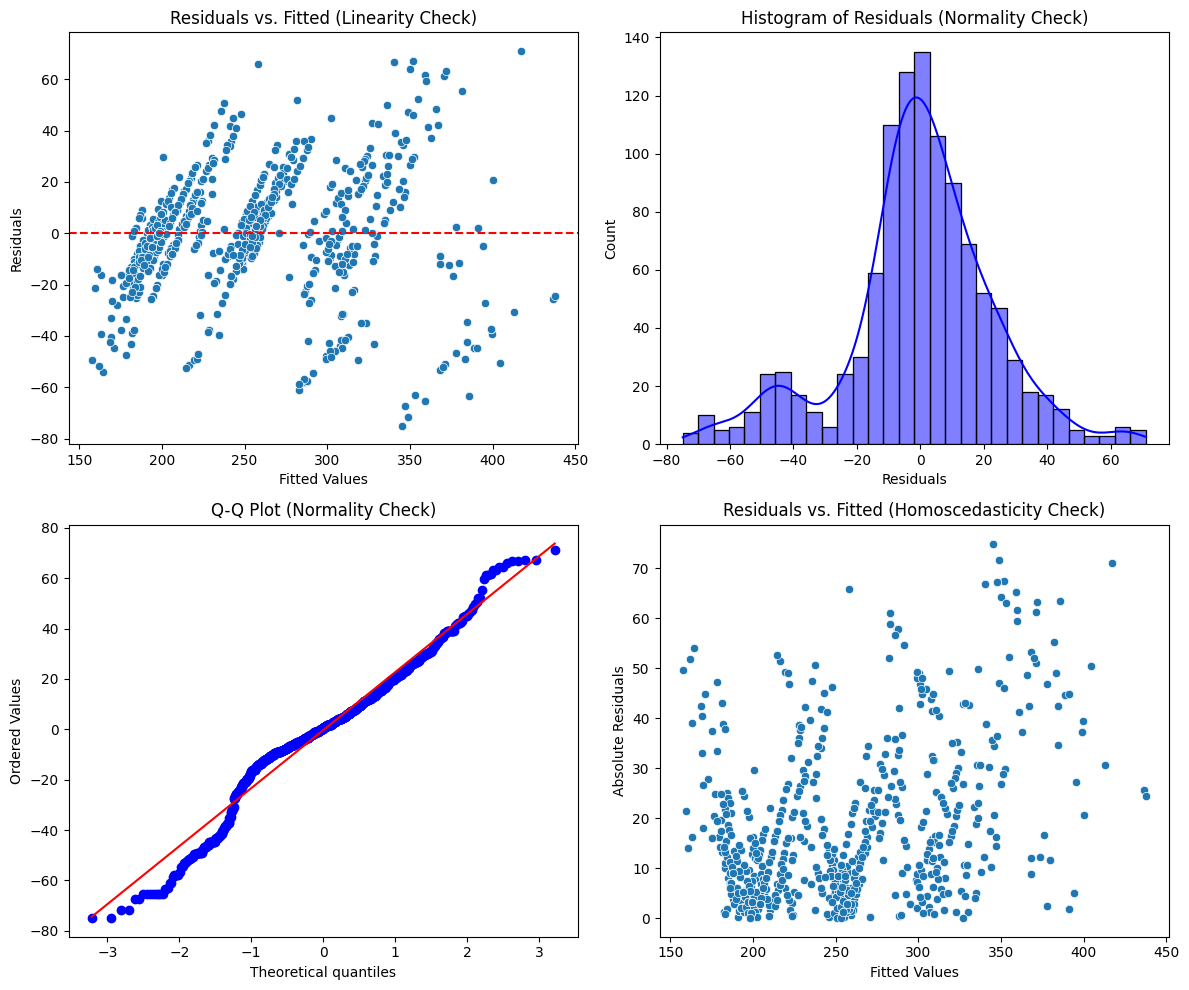

In [272]:
import scipy.stats as stats

# Predict on the entire dataset
X = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB']]
y_pred = model.predict(X)
residuals = y - y_pred

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Residuals vs. Fitted (Linearity Check)
sns.scatterplot(x=y_pred, y=residuals, ax=axes[0, 0])
axes[0, 0].axhline(0, linestyle='dashed', color='red')
axes[0, 0].set_title('Residuals vs. Fitted (Linearity Check)')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')

# 2. Histogram of Residuals (Normality Check)
sns.histplot(residuals, bins=30, kde=True, ax=axes[0, 1], color="blue")
axes[0, 1].set_title('Histogram of Residuals (Normality Check)')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Count')

# 3. Q-Q Plot (Normality Check)
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normality Check)')

# 4. Residuals vs. Fitted (Homoscedasticity Check)
sns.scatterplot(x=y_pred, y=np.abs(residuals), ax=axes[1, 1])
axes[1, 1].set_title('Residuals vs. Fitted (Homoscedasticity Check)')
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('Absolute Residuals')

plt.tight_layout()
plt.show()


### **Interpretation of Residual Plots**
The four diagnostic plots provide insights into how well the regression model fits the data and whether the assumptions of linear regression hold.

#### **1. Residuals vs. Fitted (Linearity Check) - Top Left**
- **Interpretation:** The points are scattered in a non-random pattern, forming distinct clusters. This suggests **non-linearity** in the model, meaning the relationship between the predictors and CO₂ emissions may not be purely linear.
- **Potential Issue:** The model might be missing important nonlinear relationships or interaction effects.


#### **2. Histogram of Residuals (Normality Check) - Top Right**
- **Interpretation:** The histogram of residuals appears approximately normal but shows some deviations at the tails, partiocularly at the left side of the histogram indicating presence of outliers.
- **Potential Issue:** If residuals are not normally distributed, confidence intervals and hypothesis tests may be less reliable.

#### **3. Q-Q Plot (Normality Check) - Bottom Left**
- **Interpretation:** Most points lie along the red diagonal line, but deviations appear at the extremes, suggesting **moderate normality** in residuals.
- **Potential Issue:** Some residuals deviate significantly, indicating possible **outliers** or heavy-tailed distribution.

#### **4. Residuals vs. Fitted (Homoscedasticity Check) - Bottom Right**
- **Interpretation:** The spread of residuals increases as fitted values increase, indicating **heteroscedasticity** (non-constant variance). There is presence of outliers in the dataset.
- **Potential Issue:** Unequal variance can lead to inefficient and biased standard errors.


### **Statistical Summary using Statsmodels**

In [273]:
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print("\nStatistical Summary:")
print(ols_model.summary())


Statistical Summary:
                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1747.
Date:                Thu, 20 Mar 2025   Prob (F-statistic):               0.00
Time:                        07:07:03   Log-Likelihood:                -3904.9
No. Observations:                 853   AIC:                             7818.
Df Residuals:                     849   BIC:                             7837.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const     



### **Interpretations:**

#### **1. Model Performance Metrics**
- **R-squared (0.861)**  
  - This means **86.1% of the variance in CO₂ emissions** is explained by the independent variables (**Engine Size, Cylinders, and Fuel Consumption**).  
  - This indicates a **strong model fit**.  
- **Adjusted R-squared (0.860)**  
  - Similar to R-squared but adjusted for the number of predictors.  
  - Since it's very close to R-squared, the predictors included are relevant.

- **F-statistic (1747, p-value = 0.000)**  
  - This tests whether at least one predictor is statistically significant.  
  - The very low p-value (**< 0.05**) confirms that the model is significant.

---

#### **2. Coefficients & Significance of Predictors**
| Variable | Coefficient | Std. Error | t-value | p-value | Interpretation |
|----------|------------|------------|---------|---------|---------------|
| **Constant** | 67.3484 | 3.593 | 18.745 | 0.000 | Even with zero engine size, cylinders, and fuel consumption, CO₂ emissions start at ~67.35 g/km. |
| **Engine Size** | 11.2094 | 1.782 | 6.292 | 0.000 | For every **1 unit increase** in engine size, **CO₂ emissions increase by ~11.21 g/km**, keeping other factors constant. |
| **Cylinders** | 7.1556 | 1.257 | 5.694 | 0.000 | More cylinders increase CO₂ emissions. A **1-unit increase in cylinders leads to a ~7.16 g/km increase** in CO₂ emissions. |
| **Fuel Consumption (Combined)** | 9.5208 | 0.409 | 23.265 | 0.000 | The most influential factor! A **1-unit increase in fuel consumption increases CO₂ emissions by ~9.52 g/km.** |

- **All predictors are statistically significant (p < 0.05)**, meaning they have a meaningful impact on CO₂ emissions.

---

#### **3. Residual Analysis & Model Diagnostics**
- **Durbin-Watson (1.851)**  
  - Tests for **autocorrelation** (whether residuals are correlated).  
  - A value close to **2** suggests no strong autocorrelation, meaning residuals are independent.
  
- **Omnibus & Jarque-Bera Tests (p < 0.05)**  
  - These test if residuals are normally distributed.  
  - Since the p-values are very low, residuals might **not** be perfectly normal, but slight deviations are common in large datasets.

- **Condition Number (67.1)**  
  - Measures **multicollinearity** (correlation between independent variables).  
  - Since it's **below 100**, **multicollinearity is not a serious issue**.


### **Apply  IQR to handle the Outliers by Capping**

In [274]:
from sklearn.preprocessing import RobustScaler

# Function to handle outliers using IQR with capping
def handle_outliers_iqr(df):
    df_cleaned = df.copy()
    for column in df_cleaned.columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)].shape[0]
        print(f"{column}: {outlier_count} outliers detected")
        df_cleaned[column] = np.where(df_cleaned[column] < lower_bound, lower_bound,
                                      np.where(df_cleaned[column] > upper_bound, upper_bound, df_cleaned[column]))
    return df_cleaned
cleaned_df = handle_outliers_iqr(df)


ENGINESIZE: 2 outliers detected
CYLINDERS: 0 outliers detected
FUELCONSUMPTION_CITY: 26 outliers detected
FUELCONSUMPTION_HWY: 35 outliers detected
FUELCONSUMPTION_COMB: 32 outliers detected
FUELCONSUMPTION_COMB_MPG: 13 outliers detected
CO2EMISSIONS: 6 outliers detected


#### **Update features and target variable after handling outliers**

In [275]:
X_cleaned = cleaned_df[features]
y_cleaned = cleaned_df[target]

#### **Apply Robust Scaling the retrain the model**

In [276]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_cleaned)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cleaned, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### **Make predictions on the test set**

In [277]:
y_pred = model.predict(X_test)

#### **Calculate performance metrics**

In [278]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 15.42
Mean Squared Error (MSE): 464.03
Root Mean Squared Error (RMSE): 21.54
R-squared (R²): 0.89


### **Model Performance Interpretation after Handling the Outliers**  

*   The CO₂ emissions prediction model demonstrates strong predictive
accuracy, with an **R² score of 0.89**, meaning it explains **89% of the variance** in emissions data. The **Mean Absolute Error (MAE) of 15.44** indicates that, on average, predictions deviate by **15.42 units** from actual values. The **Root Mean Squared Error (RMSE) of 21.54** suggests that larger errors exist but are not excessive.

#### **The Statistical Summary of the Test Dataset**

In [279]:
X_test_sm = sm.add_constant(X_test)
ols_model = sm.OLS(y_test, X_test_sm).fit()

print("\nStatistical Summary of the Test data after Outlier Handling:")
print(ols_model.summary())


Statistical Summary of the Test data after Outlier Handling:
                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     565.5
Date:                Thu, 20 Mar 2025   Prob (F-statistic):          2.80e-100
Time:                        07:07:03   Log-Likelihood:                -958.18
No. Observations:                 214   AIC:                             1924.
Df Residuals:                     210   BIC:                             1938.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

### **Interpretations**
This **statistical summary of an OLS regression model** provides insights into the relationship between the independent variables and the dependent variable.
where;
- x1 - Engine Size
- x2 - Cylinders
- x3 - Fuel Consumption (Combined)
### **Model Summary:**
- **R-squared = 0.890:**  
  The model explains **89% of the variance** in `CO2EMISSIONS`, which indicates a strong fit.
- **Adj. R-squared = 0.888:**  
  After adjusting for the number of predictors, the model still explains **88.8%** of the variance, confirming its robustness.
- **F-statistic = 565.5 (p-value ≈ 2.80e-100):**  
  The model is **highly significant**, meaning that at least one of the predictors significantly contributes to explaining `CO2EMISSIONS`.

### **Regression Coefficients:**
#### **Interpretation of Coefficients:**
- **Intercept (250.0882):**  
  When all predictors are **zero**, `CO2EMISSIONS` is expected to be **250.0882**.
- **Engine Size (18.4376, p = 0.011):**  
  A **1-unit increase in Engine Size** increases `CO2EMISSIONS` by **18.44 units** on average. The effect is significant at **1.1% level**.
- **Cylinders (31.1252, p = 0.001):**  
  A **1-unit increase in Cylinders** increases `CO2EMISSIONS` by **31.13 units** on average. The effect is significant at **0.1% level**.
- **Fuel Consumption_Comb (51.5629, p = 0.000):**  
  A **1-unit increase in Fuel Consumption_Comb** increases `CO2EMISSIONS` by **51.56 units** on average. The effect is highly significant (**p < 0.0001**).

All predictors are statistically significant, meaning they have a meaningful impact on `CO2EMISSIONS`.

#### **Visualize the Predicted vs Actual values**

##### **Using ENGINESIZE and CO2EMISSIONS**

In [280]:
X = df[['ENGINESIZE']]
y = df['CO2EMISSIONS']
simple_model = LinearRegression()
simple_model.fit(X, y)
x_range = np.linspace(X.min().values, X.max().values, 100).reshape(-1, 1)
y_range = simple_model.predict(x_range)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


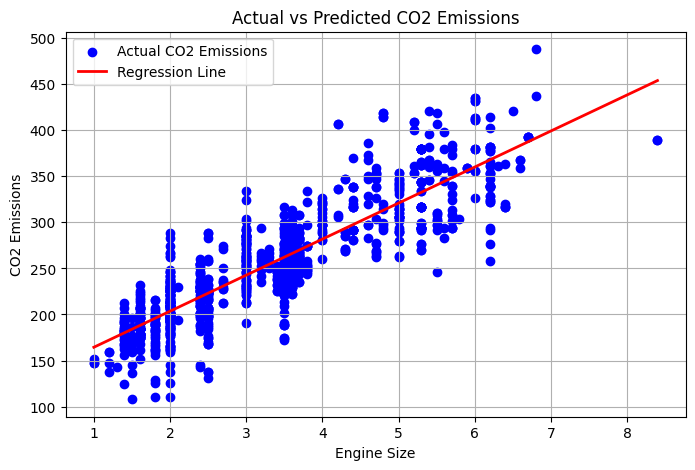

In [281]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual CO2 Emissions')
plt.plot(x_range, y_range, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.legend()
plt.grid(True)
plt.show()


### **Key Interpretations:**
1. **Positive Correlation**  
   - As **engine size increases**, **CO₂ emissions also increase**.  
   - This aligns with previous findings from the correlation heatmap.

2. **Regression Line (Red)**  
   - The red line represents the **best-fit linear regression model**.  
   - It shows the predicted CO₂ emissions based on engine size.

3. **Data Distribution (Blue Dots - Actual CO2 Emissions)**  
   - The data points closely follow the regression line, indicating a **strong linear relationship**.
   - However, there is some **scatter**, meaning other factors (e.g., fuel type, vehicle weight) might also influence CO₂ emissions.


### **Fine tune the Model**

In [282]:
# Define hyperparameter grid for Ridge Regression
param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='r2')

In [283]:
# Best model selection
best_model = grid_search.best_estimator_
print("Best hyperparameter (alpha):", grid_search.best_params_['alpha'])

Best hyperparameter (alpha): 1


### **Save the fine-tuned model as a pickle file**

In [284]:
model_file = "fine_tuned_co2_emission_model.pkl"
with open(model_file, "wb") as file:
    pickle.dump(best_model, file)

### **Conclusion**  

*   This project successfully built a model to predict CO₂ emissions with a
high level of accuracy, as shown by an **R² score of 89%** and relatively low errors. These results mean the model does a great job of capturing the key factors that influence emissions, making it useful for real-world applications like environmental monitoring and policy-making.  More importantly, this work highlights how data-driven solutions can play a big role in tackling climate change. By predicting emissions more accurately, businesses and governments can make smarter decisions to reduce carbon footprints and promote sustainability.  That said, there’s always room for improvement. Adding more relevant data, fine-tuning the model, or exploring more advanced techniques could make the predictions even better. But overall, this project shows the power of machine learning in helping us build a cleaner, greener future.